# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [71]:
import numpy as np
import pandas as pd
from sklearn import datasets
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




**Step 2:** Load the dataset _(done for you)_.

In [72]:

iris_data = datasets.load_iris()


In [73]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

    df_iris["target"] = iris_data.target
    df_iris["class"] = iris_data.target_names[iris_data.target]
    df_iris.rename(columns={'sepal length (cm)': 'sepal length', 'sepal width (cm)': 'sepal width', 'petal length (cm)': 'petal length', 'petal width (cm)': 'petal width'}, inplace=True)
    return df_iris
df_iris = create_df()
df_iris.head()

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [74]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [75]:

#From our data we will only get variable columns as np.array
x = 0
### BEGIN SOLUTION
x = df_iris[['sepal length', 'sepal width', 'petal length', 'petal width']].values
### END SOLUTIONS

In [76]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [77]:
mergings = 0 
### BEGIN SOLUTION
mergings = linkage(x,method='complete')
### END SOLUTION

In [78]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

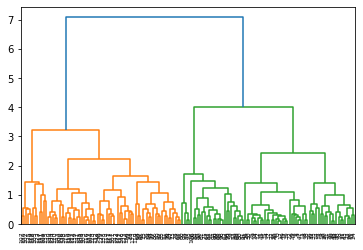

In [79]:
dn = 0
### BEGIN SOLUTION
dn = dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)
# END SOLUTION

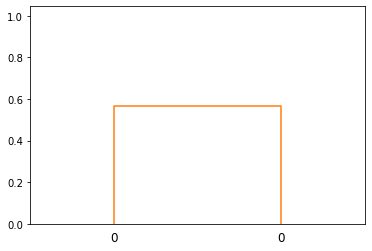

In [80]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [81]:
from sklearn.cluster import KMeans

df = pd.read_csv('/Users/talvinderjohal/Desktop/Talvinder Strive Course/ai_nov21/Chapter 2/02. Clustering/02. Partitional Algorithms/datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('/Users/talvinderjohal/Desktop/Talvinder Strive Course/ai_nov21/Chapter 2/02. Clustering/02. Partitional Algorithms/datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [82]:
model = 0
### BEGIN SOLUTION
model = KMeans(n_clusters=3)

### END SOLUTION

In [83]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [84]:
### BEGIN SOLUTION
model.fit(points)
### END SOLUTION

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [85]:
### BEGIN SOLUTION
labels = model.predict(points)
labels
### END SOLUTION

array([0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 2,
       1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       0, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2,
       1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2,
       2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2], d

In [86]:
points

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008,

In [87]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [88]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def create_df():
    
    # YOUR CODE HERE
    data = iris_data
    df = pd.DataFrame(data=data.data, columns=data.feature_names)
    df = df.rename(columns={'sepal length (cm)':'sepal length','sepal width (cm)':'sepal width', 'petal length (cm)':'petal length', 'petal width (cm)':'petal width'})
    df['target'] = data.target
    df['class'] = data.target_names[data.target]
    return df
df_iris = create_df()
df_iris.sample(n=10)

    ### END SOLUTION


,sepal length,sepal width,petal length,petal width,target,class
135,7.7,3.0,6.1,2.3,2,virginica
49,5.0,3.3,1.4,0.2,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
74,6.4,2.9,4.3,1.3,1,versicolor
58,6.6,2.9,4.6,1.3,1,versicolor
40,5.0,3.5,1.3,0.3,0,setosa
24,4.8,3.4,1.9,0.2,0,setosa
56,6.3,3.3,4.7,1.6,1,versicolor
17,5.1,3.5,1.4,0.3,0,setosa


In [89]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

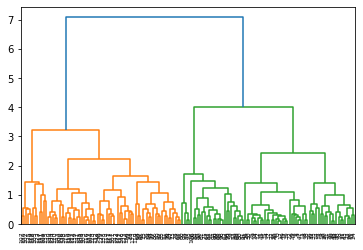

In [90]:
# plotting the data 
dn = 0
### BEGIN SOLUTION
dn = dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)

### END SOLUTION

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [91]:

### BEGIN SOLUTION
new_labels = model.predict(new_points)
new_labels

### END SOLUTION


array([1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0,
       2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2], dtype=int32)

In [92]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [93]:
#separate the data by labels like we did before

def separate_labels(labels, points):
    new_0 = []
    new_1 = []
    new_2 = []

    for x in labels:
        if x == 0:
            new_0.append(x)
            new_0 = np.array(new_0)
        elif x == 1:
            new_1.append(x)
            new_1 = np.array(new_1)
        else:
            new_2.append(x)
            new_2 = np.array(new_2)

    return new_0
    return new_1
    return new_2

### BEGIN SOLUTION

### END SOLUTION


In [94]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

NameError: name 'new_0' is not defined

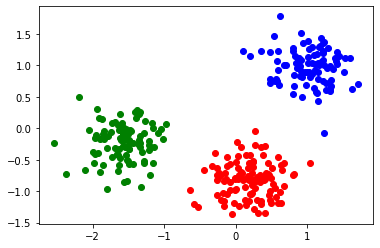

In [ ]:
#plot the new labels


### BEGIN SOLUTION
plt.scatter(data_0[:, 0],data_0[:, 1],c = 'r')
plt.scatter(data_1[:, 0],data_1[:, 1],c = 'b')
plt.scatter(data_2[:, 0],data_2[:, 1],c = 'g')
plt.show()


### END SOLUTION

In [ ]:
#plot all the points together

### BEGIN SOLUTION
plt.scatter(new_0[:, 0],new_0[:, 1],c = 'r')
plt.scatter(new_1[:, 0],new_1[:, 1],c = 'b')
plt.scatter(new_2[:, 0],new_2[:, 1],c = 'g')
plt.show()


### END SOLUTION

NameError: name 'new_0' is not defined

NameError: name 'new_0' is not defined

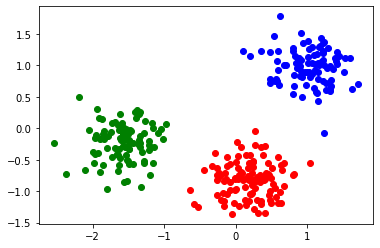

In [ ]:
plt.scatter(data_0[:, 0],data_0[:, 1],c = 'r')
plt.scatter(data_1[:, 0],data_1[:, 1],c = 'b')
plt.scatter(data_2[:, 0],data_2[:, 1],c = 'g')
plt.scatter(new_0[:, 0],new_0[:, 1],c = 'c')
plt.scatter(new_1[:, 0],new_1[:, 1],c = 'm')
plt.scatter(new_2[:, 0],new_2[:, 1],c = 'k')
plt.show()
